In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")

### 1. Análisis estadístico descriptivo de las precipitaciones históricas máximas mensuales de un estado

In [125]:
try:
    df = pd.read_csv('precipitaciones_maximas_mensuales.txt', sep='\t')
except:
    # Si falla, intentamos con espacios múltiples
    df = pd.read_csv('precipitaciones_maximas_mensuales.txt', sep='\s+')

In [126]:
# rename the columns
#df.set_index('Anio', inplace=True, drop=True)

estado_seleccionado = 'Jalisco'
df_estado = df[df['Estado'] == estado_seleccionado].copy()

print(f"Datos filtrados para el estado de {estado_seleccionado}:")
df_estado

Datos filtrados para el estado de Jalisco:


,Anio,Mes,Estado,Lluvia
13,1994,Ene,Jalisco,0.5
46,1994,Feb,Jalisco,0.0
79,1994,Mar,Jalisco,0.1
112,1994,Abr,Jalisco,1.7
145,1994,May,Jalisco,2.9
...,...,...,...,...
11728,2023,Ago,Jalisco,190.0
11761,2023,Sep,Jalisco,118.8
11794,2023,Oct,Jalisco,156.9
11827,2023,Nov,Jalisco,18.5


Elabora una gráfica de las precipitaciones máximas mensuales por año para tu estado. Para ello deberás calcular la precipitación mensual máxima de cada año y graficarla.

In [127]:
meses = {
    'Ene': 1, 'Feb': 2, 'Mar': 3, 'Abr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Ago': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dic': 12
}

df_estado['Mes_Numero'] = df_estado['Mes'].map(meses)

# Verificar si hay meses que no se han mapeado correctamente
if df_estado['Mes_Numero'].isnull().any():
    print("Algunos meses no se han mapeado correctamente. Verifica los nombres de los meses.")
    print(df_estado[df_estado['Mes_Numero'].isnull()]['Mes'].unique())

# Crear la columna 'Fecha'
df_estado['Fecha'] = pd.to_datetime(df_estado['Anio'].astype(str) + '-' + df_estado['Mes_Numero'].astype(str) + '-01')

# Extraer año y mes (aunque ya los tenemos, esto es para asegurarnos)
df_estado['Año'] = df_estado['Fecha'].dt.year
df_estado['Mes'] = df_estado['Fecha'].dt.month

df_estado.drop(columns=['Anio', 'Mes_Numero'], inplace=True)

df_estado.head()

,Mes,Estado,Lluvia,Fecha,Año
13,1,Jalisco,0.5,1994-01-01,1994
46,2,Jalisco,0.0,1994-02-01,1994
79,3,Jalisco,0.1,1994-03-01,1994
112,4,Jalisco,1.7,1994-04-01,1994
145,5,Jalisco,2.9,1994-05-01,1994


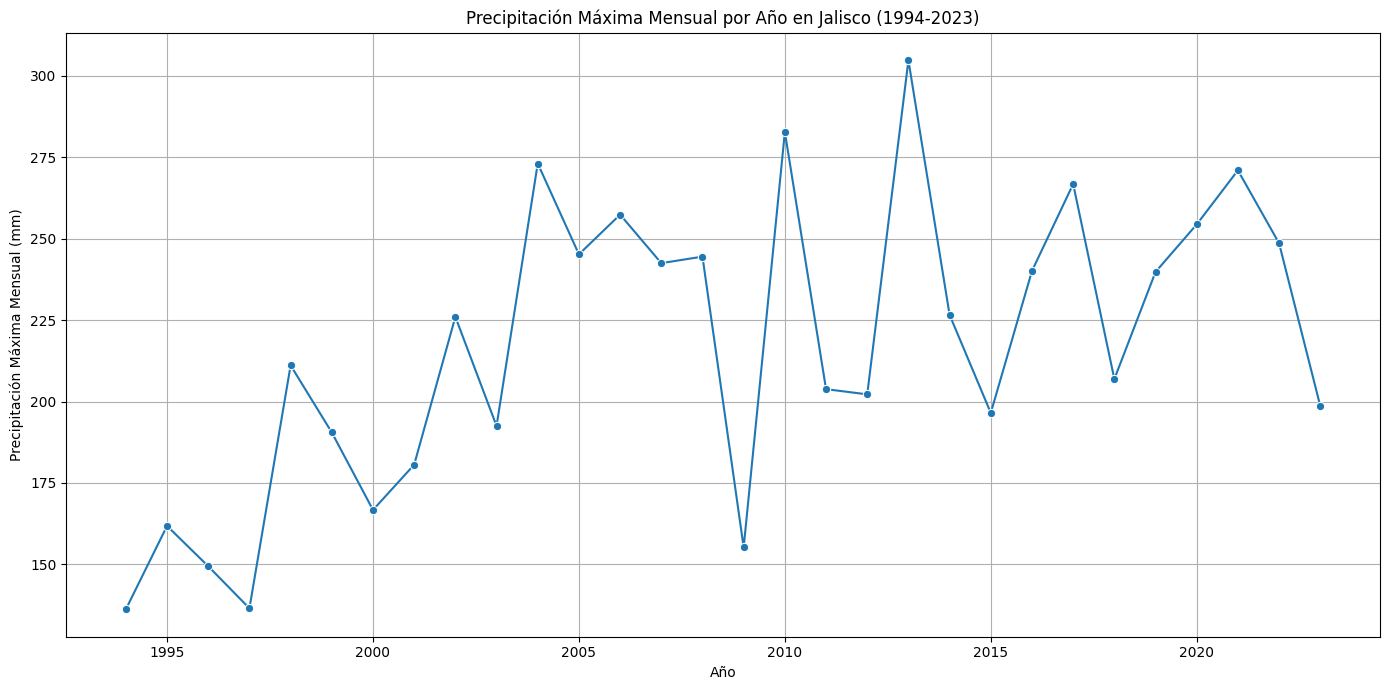

In [128]:
# Agrupar por año y mes, luego obtener el máximo de precipitación
max_mensual = df_estado.groupby(['Año', 'Mes'])['Lluvia'].max().reset_index()

# Ahora, para cada año, obtener la máxima precipitación mensual
max_anual = max_mensual.groupby('Año')['Lluvia'].max().reset_index()
max_anual.rename(columns={'Lluvia': 'Precipitación_Maxima'}, inplace=True)

plt.figure(figsize=(14, 7))
sns.lineplot(data=max_anual, x='Año', y='Precipitación_Maxima', marker='o')
plt.title(f'Precipitación Máxima Mensual por Año en {estado_seleccionado} (1994-2023)')
plt.xlabel('Año')
plt.ylabel('Precipitación Máxima Mensual (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

Analiza los datos de precipitaciones máximas mensuaels del estado seleccionado. 

In [129]:
# Medidas de centralización
media = max_anual['Precipitación_Maxima'].mean()
mediana = max_anual['Precipitación_Maxima'].median()

# Medidas de variación
desviacion_std = max_anual['Precipitación_Maxima'].std()
rango_intercuartilico = max_anual['Precipitación_Maxima'].quantile(0.75) - max_anual['Precipitación_Maxima'].quantile(0.25)

print(f"Medidas de Centralización y Variación para {estado_seleccionado}:")
print(f"Media: {media:.2f} mm")
print(f"Mediana: {mediana:.2f} mm")
print(f"Desviación Estándar: {desviacion_std:.2f} mm")
print(f"Rango Intercuartílico: {rango_intercuartilico:.2f} mm")

Medidas de Centralización y Variación para Jalisco:
Media: 217.07 mm
Mediana: 218.55 mm
Desviación Estándar: 45.08 mm
Rango Intercuartílico: 56.75 mm


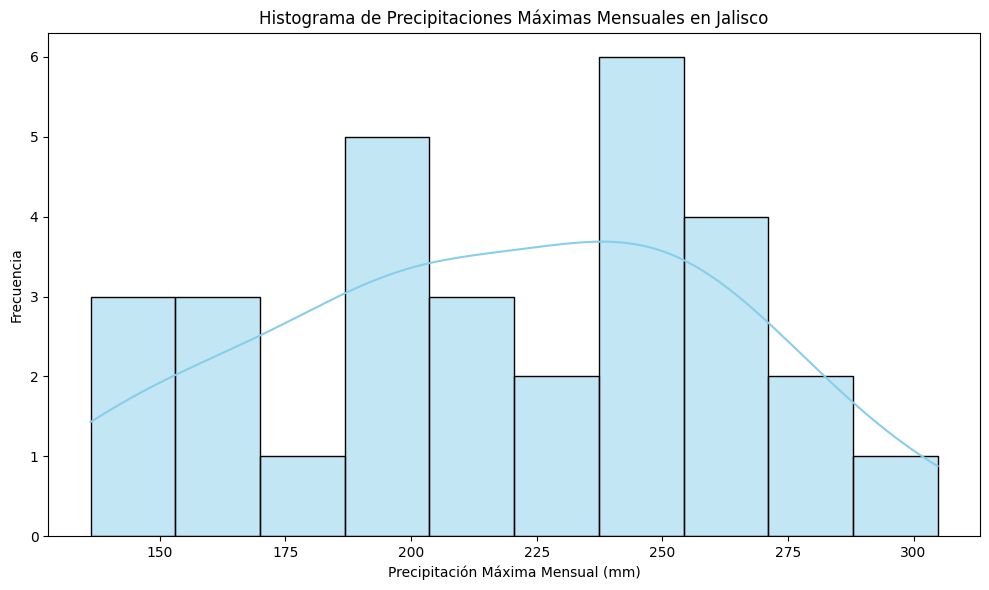

In [130]:
plt.figure(figsize=(10, 6))
sns.histplot(max_anual['Precipitación_Maxima'], bins=10, kde=True, color='skyblue')
plt.title(f'Histograma de Precipitaciones Máximas Mensuales en {estado_seleccionado}')
plt.xlabel('Precipitación Máxima Mensual (mm)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

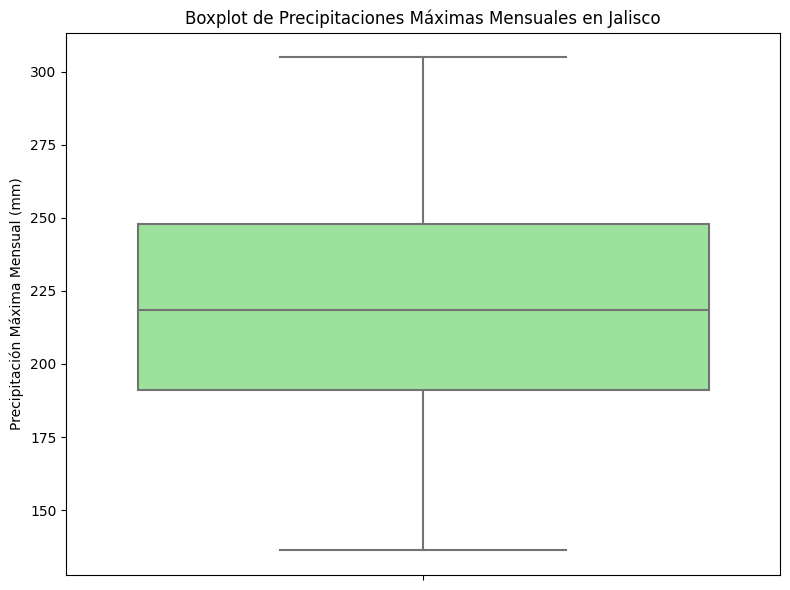

In [131]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=max_anual['Precipitación_Maxima'], color='lightgreen')
plt.title(f'Boxplot de Precipitaciones Máximas Mensuales en {estado_seleccionado}')
plt.ylabel('Precipitación Máxima Mensual (mm)')
plt.tight_layout()
plt.show()

Descripción de los datos: 
- Centralización: En el histograma, se puede observar que los valores más frecuentes se encuentran en un rango entre 200 y 250 mm. En el boxplot se muestra que la mediana de la precipitación máxima mensual está cercana a los 225 mm.

- Sesgo:
El histograma indica una ligera asimetría hacia la derecha (sesgo positivo), ya que hay una menor cantidad de datos en el extremo superior, es decir, en valores más altos de precipitación (por encima de los 275 mm). 

- Variación: El histograma también muestra una dispersión de datos significativa, con precipitaciones que varían entre aproximadamente 140 mm y 300 mm.

- Presencia de Outliers: No se observan valores atípicos claros en el boxplot, ya que no hay puntos fuera de los bigotes.


¿Qué puedes concluir observando la gráfica de los máximos mensuales anuales para tu Estado?

- ¿Observas alguna tendencia? No se observa una tendencia clara anque si un leve crecimiento de la precipitación máxima mensual en los últimos años a comparación de los primeros años.

- ¿Puedes concluir que cada determinado número de años la cantidad de precipitación sube o baja? Aunque se observan fluctuaciones, no parece haber un patrón cíclico fijo en el que, por ejemplo, cada cierto número de años la precipitación suba o baje de manera predecible.

- ¿Para qué nos sirve analizar este tipo de gráficas? Nos permiten visualizar el comportamiento histórico de las precipitaciones máximas en la región y detectar posibles patrones o anomalías.

### 2. Análisis de Frecuencias Método Gráfico

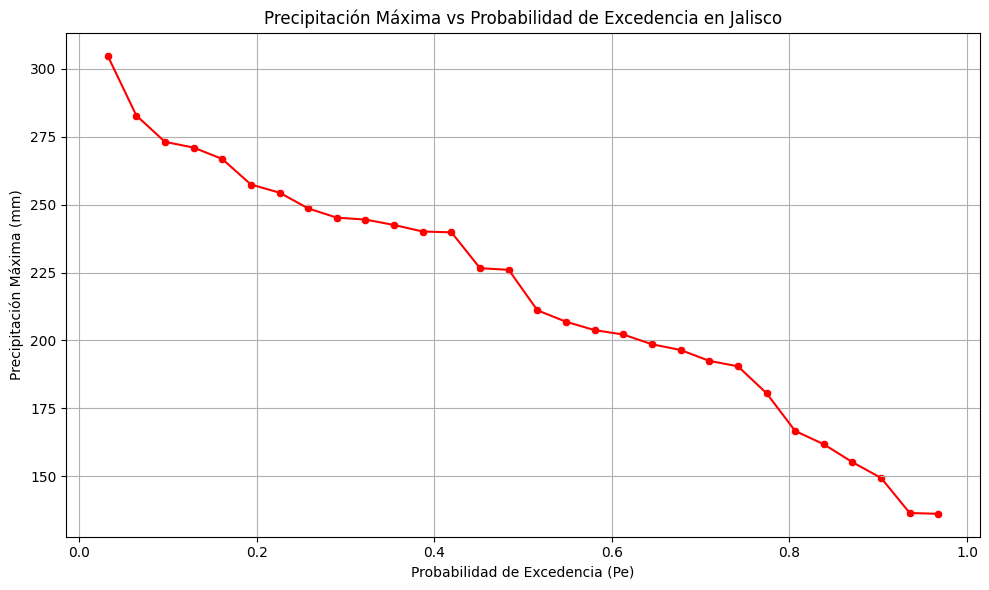

In [132]:
# 1. Ordenar las precipitaciones de mayor a menor
max_anual_sorted = max_anual.sort_values(by='Precipitación_Maxima', ascending=False).reset_index(drop=True)

# 2. Asignar el rango 'm'
max_anual_sorted['m'] = max_anual_sorted.index + 1  # m = 1, 2, 3, ..., N

# 3. Calcular la probabilidad de excedencia 'Pe' utilizando Weibull
N = len(max_anual_sorted)
max_anual_sorted['Pe'] = max_anual_sorted['m'] / (N + 1)

# 4. Calcular la probabilidad de no excedencia 'Pn'
max_anual_sorted['Pn'] = 1 - max_anual_sorted['Pe']

# 5. Calcular el periodo de retorno 'T'
max_anual_sorted['T'] = 1 / max_anual_sorted['Pe']

# 6. Generar las gráficas

# a. Precipitación Máxima vs Probabilidad de Excedencia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=max_anual_sorted, x='Pe', y='Precipitación_Maxima', color='red')
sns.lineplot(data=max_anual_sorted, x='Pe', y='Precipitación_Maxima', color='red')
plt.title(f'Precipitación Máxima vs Probabilidad de Excedencia en {estado_seleccionado}')
plt.xlabel('Probabilidad de Excedencia (Pe)')
plt.ylabel('Precipitación Máxima (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

Las precipitaciones más altas tienen una menor probabilidad de ocurrir.

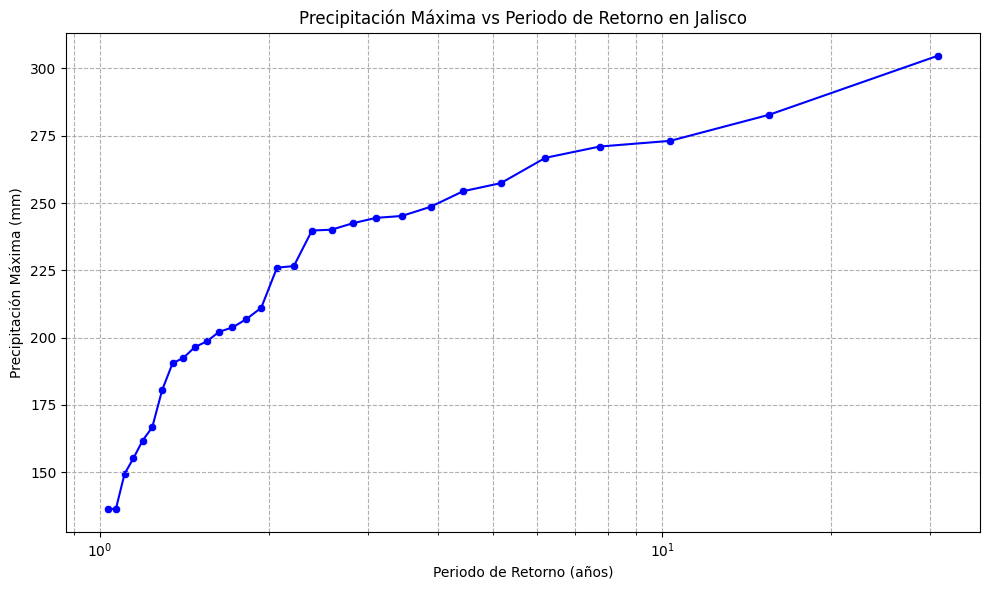

In [133]:
# b. Precipitación Máxima vs Periodo de Retorno
plt.figure(figsize=(10, 6))
sns.scatterplot(data=max_anual_sorted, x='T', y='Precipitación_Maxima', color='blue')
sns.lineplot(data=max_anual_sorted, x='T', y='Precipitación_Maxima', color='blue')
plt.title(f'Precipitación Máxima vs Periodo de Retorno en {estado_seleccionado}')
plt.xlabel('Periodo de Retorno (años)')
plt.ylabel('Precipitación Máxima (mm)')
plt.xscale('log')  # Escala logarítmica para mejor visualización
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

El periodo de retorno es el tiempo promedio que transcurre entre eventos de una magnitud de precipitación determinada. Precipitaciones de menor magnitud (150 mm) tienen periodos de retorno más cortos (cerca de 1 año), mientras que las precipitaciones más extremas (300 mm) tienen periodos de retorno más largos (más de 10 años).

Describe las gráficas obtenidas. 
-¿Qué significa la probabilidad de excedencia? Es la probabilidad de que un evento, como una precipitación máxima, sea igualado o superado en un año determinado. 

-¿Qué significa el periodo de retorno? Es el intervalo promedio de tiempo entre eventos de una magnitud igual o mayor a la precipitación máxima analizada.

-¿Por qué es importante en hidrología? Para saber qué tan probable es que un evento extremo ocurra y su frecuencia permite a los ingenieros diseñar estructuras que soporten condiciones adversas.

-¿Qué valores son deseables en la probabilidad de excedencia para una precipitación de diseño de una obra? Para obras de diseño es deseable trabajar con baja probabilidad de excedencia (0.01 a 0.05) y altos periodos de retorno (de 50 a 100 años), para garantizar la seguridad y longevidad frente a eventos extremos.

### 3. Análisis de Frecuencias Método Analítico

In [134]:
from scipy import stats

Distribución Normal

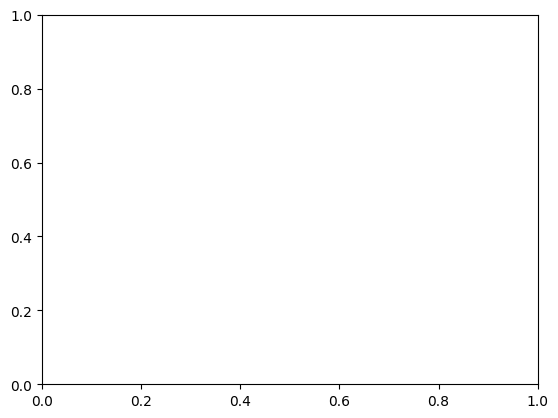

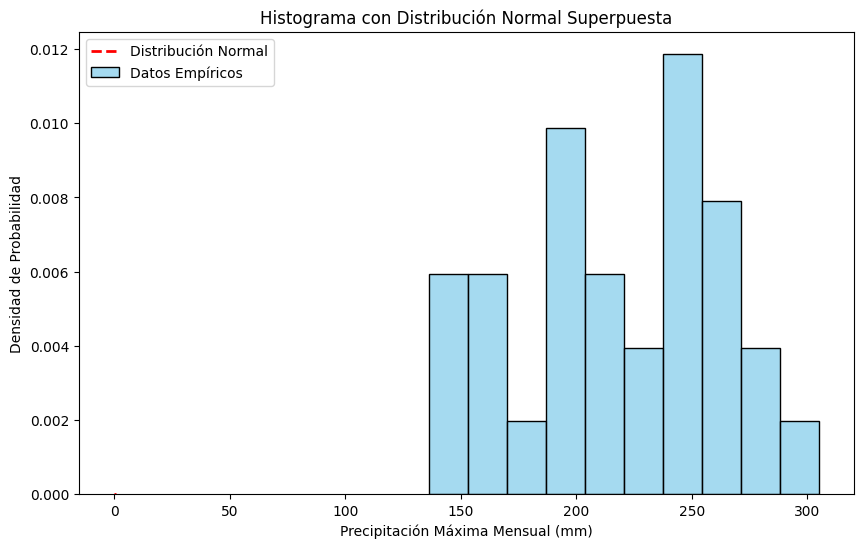

In [135]:
# Calcular parámetros de la distribución normal
mu, std = stats.norm.fit(max_anual['Precipitación_Maxima'])

# Crear valores para la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

# Plotear el histograma y la distribución normal
plt.figure(figsize=(10, 6))
sns.histplot(max_anual['Precipitación_Maxima'], bins=10, kde=False, stat='density', color='skyblue', label='Datos Empíricos')
plt.plot(x, p, 'r--', linewidth=2, label='Distribución Normal')
plt.title('Histograma con Distribución Normal Superpuesta')
plt.xlabel('Precipitación Máxima Mensual (mm)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

-¿te parece que los datos se ajustan bien a una distribución normal? No parece que los datos se ajusten perfectamente a una distribución normal. Observando el histograma y la curva normal superpuesta, se pueden notar varias desviaciones en su Asimetría y Curtosis.

-¿Cuántos parámetros tiene la distribución Normal? La distribución normal tiene dos parámetros ¿Cuáles son? Media (μ) y Desviación estándar (σ)

-¿Por qué los parámetros se calculan de la forma en cómo se hace en el código? La Media (μ) se calcula sumando todos los valores de los datos y dividiendo entre el número de observaciones. La Desviación estándar (σ) se calcula como la raíz cuadrada de la varianza, que es el promedio de los cuadrados de las diferencias entre cada valor y la media.

In [136]:
import statsmodels.api as sm

<Figure size 800x600 with 0 Axes>

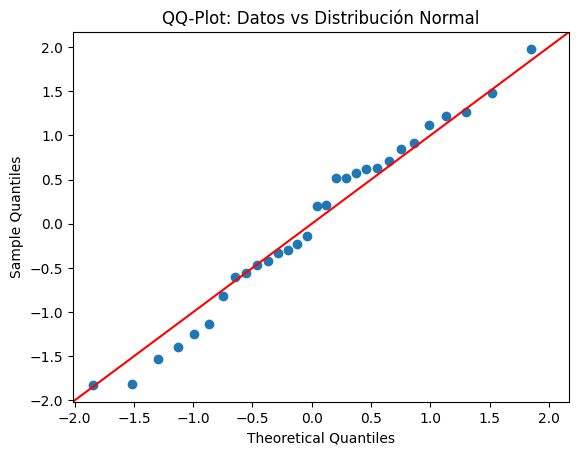

In [137]:
# Crear QQ-plot
plt.figure(figsize=(8, 6))
sm.qqplot(max_anual['Precipitación_Maxima'], stats.norm, loc=mu, scale=std, line='45', fit=True)
plt.title('QQ-Plot: Datos vs Distribución Normal')
plt.show()

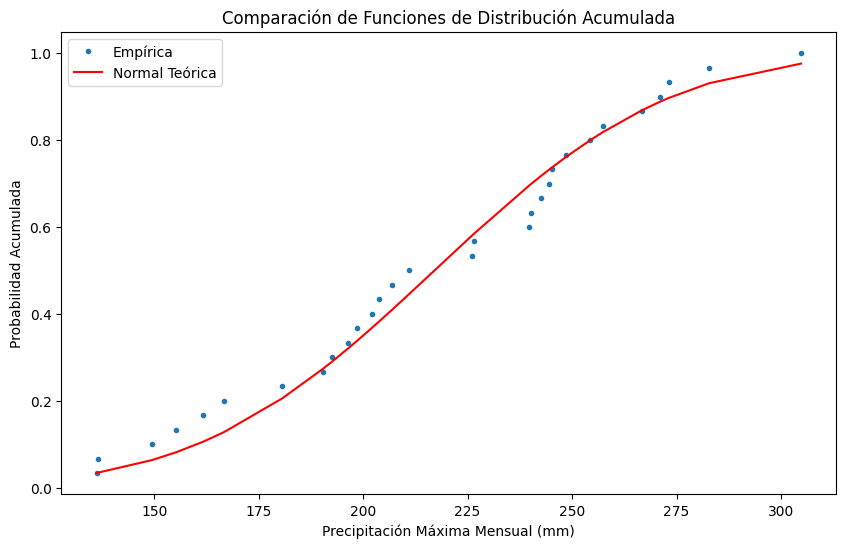

In [138]:
# Ordenar los datos
sorted_data = np.sort(max_anual['Precipitación_Maxima'])

# Calcular la función de distribución acumulada empírica
ecdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)

# Calcular la función de distribución acumulada teórica (Normal)
cdf_norm = stats.norm.cdf(sorted_data, mu, std)

# Plotear
plt.figure(figsize=(10, 6))
plt.plot(sorted_data, ecdf, marker='.', linestyle='none', label='Empírica')
plt.plot(sorted_data, cdf_norm, 'r-', label='Normal Teórica')
plt.title('Comparación de Funciones de Distribución Acumulada')
plt.xlabel('Precipitación Máxima Mensual (mm)')
plt.ylabel('Probabilidad Acumulada')
plt.legend()
plt.show()

- Datos empíricos: Son los datos reales que se obtienen de observaciones o experimentos en el mundo real. En este caso, los datos empíricos corresponden a las precipitaciones máximas mensuales en Jalisco registradas a lo largo de los años.

- Datos teóricos: Son valores generados a partir de un modelo teórico o matemático. Para este ejemplo, los datos teóricos se derivan de una distribución normal ajustada a los datos empíricos, usando los parámetros de la media y la desviación estándar calculados.

- ¿Se parecen las distribuciones de probabilidad acumuladas? los datos empíricos y teóricos son bastante similares, ya que los puntos se alinean con la línea roja. Sin embargo, en los extremos, los puntos empiezan a desviarse de la línea.

In [139]:
# Prueba de Shapiro-Wilk
shapiro_stat, shapiro_p = stats.shapiro(max_anual['Precipitación_Maxima'])
print(f"Shapiro-Wilk: Estadístico={shapiro_stat:.4f}, p-valor={shapiro_p:.4f}")

Shapiro-Wilk: Estadístico=0.9727, p-valor=0.6157


In [140]:
# Prueba de Kolmogorov-Smirnov
ks_stat, ks_p = stats.kstest(max_anual['Precipitación_Maxima'], 'norm', args=(mu, std))
print(f"Kolmogorov-Smirnov: Estadístico={ks_stat:.4f}, p-valor={ks_p:.4f}")

Kolmogorov-Smirnov: Estadístico=0.1293, p-valor=0.6505


In [141]:
alpha = 0.05
print("\nInterpretación de las Pruebas de Bondad de Ajuste:")
print(f"Shapiro-Wilk p-valor: {shapiro_p:.4f}")
if shapiro_p > alpha:
    print("No se rechaza H0: Los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza H0: Los datos no siguen una distribución normal.")

print(f"Kolmogorov-Smirnov p-valor: {ks_p:.4f}")
if ks_p > alpha:
    print("No se rechaza H0: Los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza H0: Los datos no siguen una distribución normal.")


Interpretación de las Pruebas de Bondad de Ajuste:
Shapiro-Wilk p-valor: 0.6157
No se rechaza H0: Los datos parecen seguir una distribución normal.
Kolmogorov-Smirnov p-valor: 0.6505
No se rechaza H0: Los datos parecen seguir una distribución normal.


In [142]:
print("\nResumen del Ajuste a la Distribución Normal:")
print(f"Media (mu): {mu:.2f} mm")
print(f"Desviación Estándar (std): {std:.2f} mm")
print(f"Shapiro-Wilk Estadístico: {shapiro_stat:.4f}, p-valor: {shapiro_p:.4f}")
print(f"Kolmogorov-Smirnov Estadístico: {ks_stat:.4f}, p-valor: {ks_p:.4f}")


Resumen del Ajuste a la Distribución Normal:
Media (mu): 217.07 mm
Desviación Estándar (std): 44.32 mm
Shapiro-Wilk Estadístico: 0.9727, p-valor: 0.6157
Kolmogorov-Smirnov Estadístico: 0.1293, p-valor: 0.6505


- ¿Qué información nos dan las pruebas? Nos proporcionan un p-valor que indica si hay suficiente evidencia para rechazar la hipótesis nula (H0). 

- ¿Cuáles son los valores de los estadísticos? Shapiro-Wilk: El p-valor reportado es 0.6157.
Kolmogorov-Smirnov: El p-valor reportado es 0.6505.

- ¿Cuál es el p-value de las pruebas? El p-valor es una medida de la probabilidad de que los datos observados provengan de una distribución normal.

- ¿Se aceptan o se rechazan las hipótesis nulas? Dado que ambos p-valores son significativamente mayores que el umbral común de significancia (α = 0.05), no se rechaza la hipótesis nula (H0) en ninguna de las dos pruebas. Esto significa que, con base en estas pruebas estadísticas, no hay suficiente evidencia para afirmar que los datos no siguen una distribución normal.

- ¿Podemos concluir que los datos de las precipitaciones máximas mensuales son normales? ¿Por qué? Con base en los resultados de las pruebas de Shapiro-Wilk y Kolmogorov-Smirnov, no podemos rechazar que los datos sigan una distribución normal. Sin embargo, esto no significa que los datos sean perfectamente normales, solo indica que no tenemos evidencia suficiente para descartar la normalidad.

Distribución Log-Normal

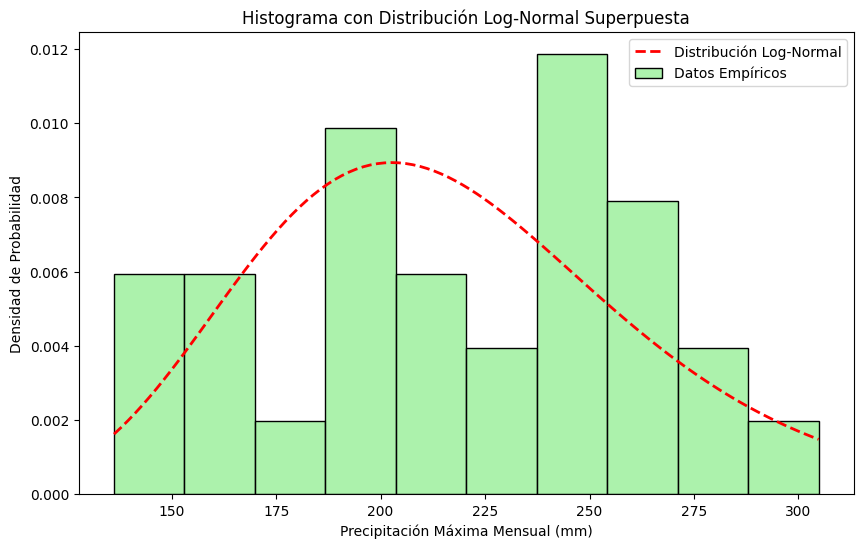

In [143]:
# Ajustar distribución log-normal
shape, loc, scale = stats.lognorm.fit(max_anual['Precipitación_Maxima'], floc=0)  # Fijamos loc=0 para una mejor interpretación

# Crear valores para la distribución log-normal
x = np.linspace(min(max_anual['Precipitación_Maxima']), max(max_anual['Precipitación_Maxima']), 100)
pdf_lognorm = stats.lognorm.pdf(x, shape, loc, scale)

# Plotear el histograma y la distribución log-normal
plt.figure(figsize=(10, 6))
sns.histplot(max_anual['Precipitación_Maxima'], bins=10, kde=False, stat='density', color='lightgreen', label='Datos Empíricos')
plt.plot(x, pdf_lognorm, 'r--', linewidth=2, label='Distribución Log-Normal')
plt.title('Histograma con Distribución Log-Normal Superpuesta')
plt.xlabel('Precipitación Máxima Mensual (mm)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

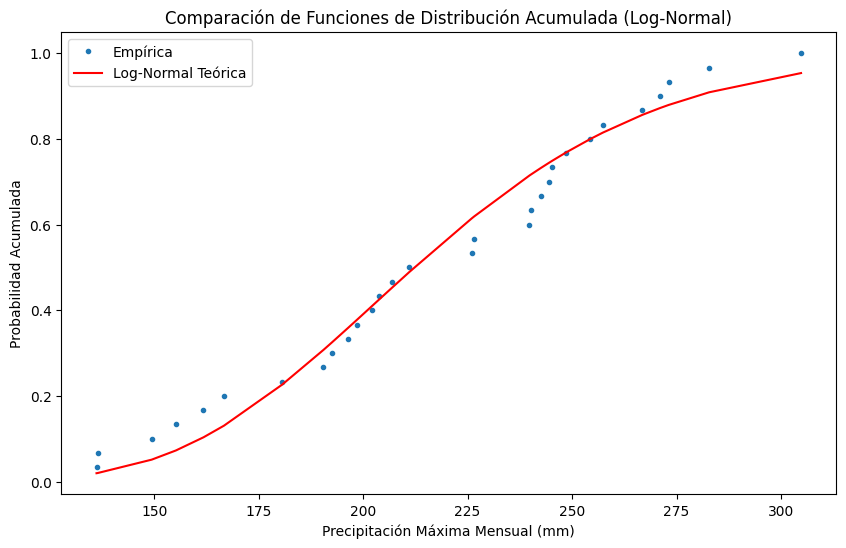

In [144]:
# Calcular la función de distribución acumulada teórica (Log-Normal)
cdf_lognorm = stats.lognorm.cdf(sorted_data, shape, loc, scale)

# Plotear
plt.figure(figsize=(10, 6))
plt.plot(sorted_data, ecdf, marker='.', linestyle='none', label='Empírica')
plt.plot(sorted_data, cdf_lognorm, 'r-', label='Log-Normal Teórica')
plt.title('Comparación de Funciones de Distribución Acumulada (Log-Normal)')
plt.xlabel('Precipitación Máxima Mensual (mm)')
plt.ylabel('Probabilidad Acumulada')
plt.legend()
plt.show()

In [145]:
# Prueba de Kolmogorov-Smirnov para Log-Normal
ks_stat_lognorm, ks_p_lognorm = stats.kstest(max_anual['Precipitación_Maxima'], 'lognorm', args=(shape, loc, scale))
print(f"Kolmogorov-Smirnov (Log-Normal): Estadístico={ks_stat_lognorm:.4f}, p-valor={ks_p_lognorm:.4f}")

Kolmogorov-Smirnov (Log-Normal): Estadístico=0.1478, p-valor=0.4834


In [146]:
# Método de Momentos
data = max_anual['Precipitación_Maxima']
log_data = np.log(data)

# Calcular la media y varianza de los datos log-transformados
mean_log = np.mean(log_data)
var_log = np.var(log_data, ddof=1)

# Calcular parámetros
sigma_mm = np.sqrt(var_log)
mu_mm = mean_log

print(f"\nMétodo de Momentos para Log-Normal:")
print(f"Mu (media log): {mu_mm:.4f}")
print(f"Sigma (desviación estándar log): {sigma_mm:.4f}")

# Comparar con parámetros ajustados por Scipy
print(f"\nParámetros ajustados por Scipy (Log-Normal):")
print(f"Shape (sigma): {shape:.4f}")
print(f"Scale (exp(mu)): {scale:.4f}")


Método de Momentos para Log-Normal:
Mu (media log): 5.3579
Sigma (desviación estándar log): 0.2188

Parámetros ajustados por Scipy (Log-Normal):
Shape (sigma): 0.2151
Scale (exp(mu)): 212.2887


In [147]:
print("\nResumen del Ajuste a la Distribución Log-Normal:")
print(f"Shape (sigma): {shape:.2f}")
print(f"Loc: {loc:.2f}")
print(f"Scale (exp(mu)): {scale:.2f}")
print(f"Kolmogorov-Smirnov Estadístico: {ks_stat_lognorm:.4f}, p-valor: {ks_p_lognorm:.4f}")


Resumen del Ajuste a la Distribución Log-Normal:
Shape (sigma): 0.22
Loc: 0.00
Scale (exp(mu)): 212.29
Kolmogorov-Smirnov Estadístico: 0.1478, p-valor: 0.4834


Distribución Exponencial

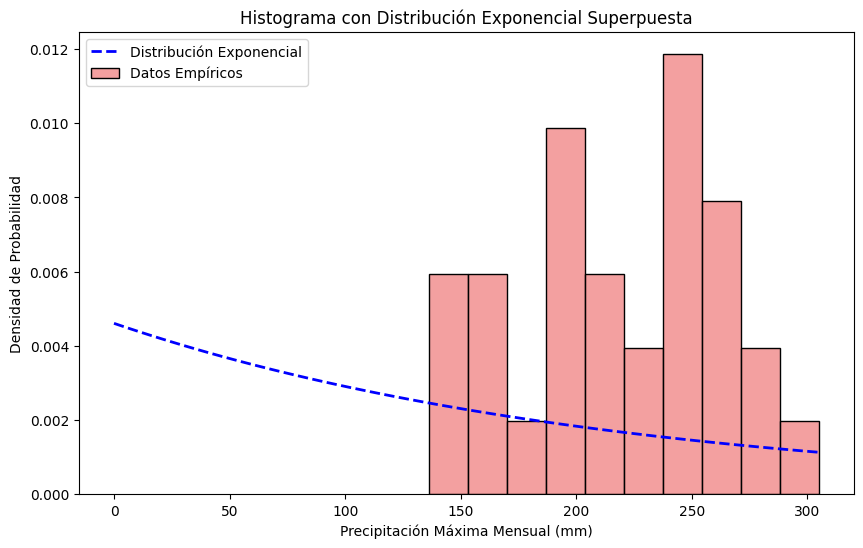

In [148]:
# Ajustar distribución exponencial
loc_exp, scale_exp = stats.expon.fit(max_anual['Precipitación_Maxima'], floc=0)  # Fijamos loc=0

# Crear valores para la distribución exponencial
x = np.linspace(0, max(max_anual['Precipitación_Maxima']), 100)
pdf_expon = stats.expon.pdf(x, loc=loc_exp, scale=scale_exp)

# Plotear el histograma y la distribución exponencial
plt.figure(figsize=(10, 6))
sns.histplot(max_anual['Precipitación_Maxima'], bins=10, kde=False, stat='density', color='lightcoral', label='Datos Empíricos')
plt.plot(x, pdf_expon, 'b--', linewidth=2, label='Distribución Exponencial')
plt.title('Histograma con Distribución Exponencial Superpuesta')
plt.xlabel('Precipitación Máxima Mensual (mm)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

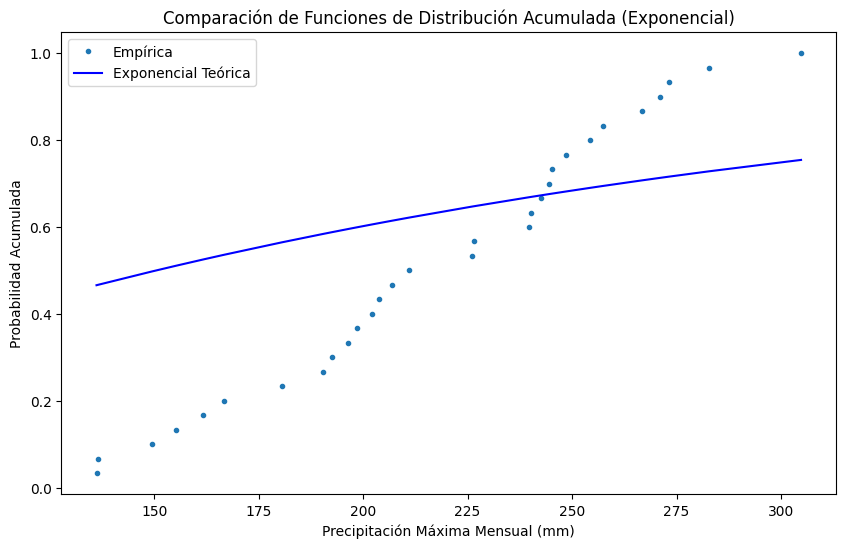

In [149]:
# Calcular la función de distribución acumulada teórica (Exponencial)
cdf_expon = stats.expon.cdf(sorted_data, loc=loc_exp, scale=scale_exp)

# Plotear
plt.figure(figsize=(10, 6))
plt.plot(sorted_data, ecdf, marker='.', linestyle='none', label='Empírica')
plt.plot(sorted_data, cdf_expon, 'b-', label='Exponencial Teórica')
plt.title('Comparación de Funciones de Distribución Acumulada (Exponencial)')
plt.xlabel('Precipitación Máxima Mensual (mm)')
plt.ylabel('Probabilidad Acumulada')
plt.legend()
plt.show()

In [150]:
# Prueba de Kolmogorov-Smirnov para Exponencial
ks_stat_expon, ks_p_expon = stats.kstest(max_anual['Precipitación_Maxima'], 'expon', args=(loc_exp, scale_exp))
print(f"Kolmogorov-Smirnov (Exponencial): Estadístico={ks_stat_expon:.4f}, p-valor={ks_p_expon:.4f}")

Kolmogorov-Smirnov (Exponencial): Estadístico=0.4660, p-valor=0.0000


In [151]:
# Método de Momentos
mean_data = np.mean(max_anual['Precipitación_Maxima'])
lambda_mm = 1 / mean_data  # Para Exponencial, lambda = 1 / media

print(f"\nMétodo de Momentos para Exponencial:")
print(f"Lambda: {lambda_mm:.4f}")

# Comparar con parámetros ajustados por Scipy
print(f"\nParámetros ajustados por Scipy (Exponencial):")
print(f"Loc: {loc_exp:.2f}")
print(f"Scale (1/lambda): {scale_exp:.2f}")


Método de Momentos para Exponencial:
Lambda: 0.0046

Parámetros ajustados por Scipy (Exponencial):
Loc: 0.00
Scale (1/lambda): 217.07


In [152]:
print("\nResumen del Ajuste a la Distribución Exponencial:")
print(f"Loc: {loc_exp:.2f}")
print(f"Scale (1/lambda): {scale_exp:.2f}")
print(f"Kolmogorov-Smirnov Estadístico: {ks_stat_expon:.4f}, p-valor: {ks_p_expon:.4f}")


Resumen del Ajuste a la Distribución Exponencial:
Loc: 0.00
Scale (1/lambda): 217.07
Kolmogorov-Smirnov Estadístico: 0.4660, p-valor: 0.0000


Distribución Gamma

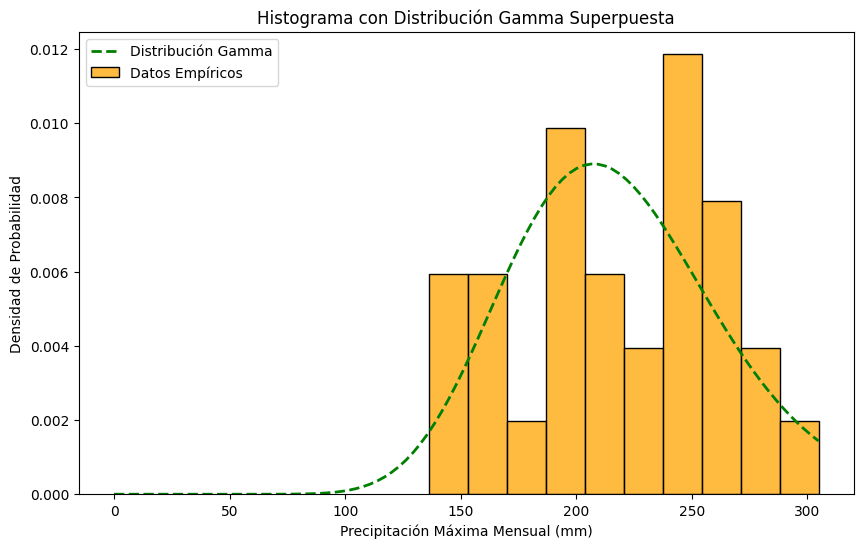

In [153]:
# Ajustar distribución Gamma
shape_gamma, loc_gamma, scale_gamma = stats.gamma.fit(max_anual['Precipitación_Maxima'], floc=0)  # Fijamos loc=0

# Crear valores para la distribución Gamma
x = np.linspace(0, max(max_anual['Precipitación_Maxima']), 100)
pdf_gamma = stats.gamma.pdf(x, shape_gamma, loc=loc_gamma, scale=scale_gamma)

# Plotear el histograma y la distribución Gamma
plt.figure(figsize=(10, 6))
sns.histplot(max_anual['Precipitación_Maxima'], bins=10, kde=False, stat='density', color='orange', label='Datos Empíricos')
plt.plot(x, pdf_gamma, 'g--', linewidth=2, label='Distribución Gamma')
plt.title('Histograma con Distribución Gamma Superpuesta')
plt.xlabel('Precipitación Máxima Mensual (mm)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

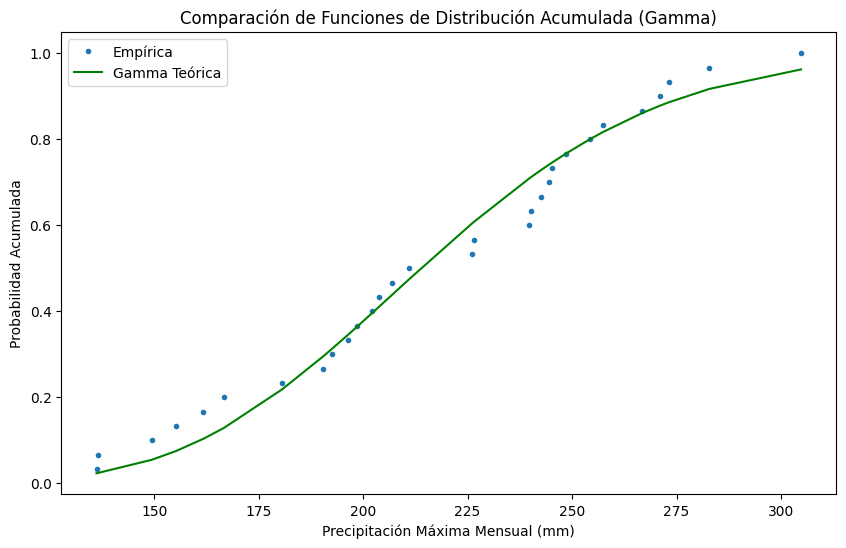

In [154]:
# Calcular la función de distribución acumulada teórica (Gamma)
cdf_gamma = stats.gamma.cdf(sorted_data, shape_gamma, loc=loc_gamma, scale=scale_gamma)

# Plotear
plt.figure(figsize=(10, 6))
plt.plot(sorted_data, ecdf, marker='.', linestyle='none', label='Empírica')
plt.plot(sorted_data, cdf_gamma, 'g-', label='Gamma Teórica')
plt.title('Comparación de Funciones de Distribución Acumulada (Gamma)')
plt.xlabel('Precipitación Máxima Mensual (mm)')
plt.ylabel('Probabilidad Acumulada')
plt.legend()
plt.show()

In [155]:
# Prueba de Kolmogorov-Smirnov para Gamma
ks_stat_gamma, ks_p_gamma = stats.kstest(max_anual['Precipitación_Maxima'], 'gamma', args=(shape_gamma, loc_gamma, scale_gamma))
print(f"Kolmogorov-Smirnov (Gamma): Estadístico={ks_stat_gamma:.4f}, p-valor={ks_p_gamma:.4f}")

Kolmogorov-Smirnov (Gamma): Estadístico=0.1426, p-valor=0.5291


In [156]:
# Método de Momentos
mean_data = np.mean(max_anual['Precipitación_Maxima'])
var_data = np.var(max_anual['Precipitación_Maxima'], ddof=1)

shape_mm = (mean_data ** 2) / var_data
scale_mm = var_data / mean_data

print(f"\nMétodo de Momentos para Gamma:")
print(f"Shape (k): {shape_mm:.4f}")
print(f"Scale (theta): {scale_mm:.4f}")

# Comparar con parámetros ajustados por Scipy
print(f"\nParámetros ajustados por Scipy (Gamma):")
print(f"Shape (k): {shape_gamma:.2f}")
print(f"Loc: {loc_gamma:.2f}")
print(f"Scale (theta): {scale_gamma:.2f}")


Método de Momentos para Gamma:
Shape (k): 23.1876
Scale (theta): 9.3615

Parámetros ajustados por Scipy (Gamma):
Shape (k): 22.61
Loc: 0.00
Scale (theta): 9.60


In [157]:
print("\nResumen del Ajuste a la Distribución Gamma:")
print(f"Shape (k): {shape_gamma:.2f}")
print(f"Loc: {loc_gamma:.2f}")
print(f"Scale (theta): {scale_gamma:.2f}")
print(f"Kolmogorov-Smirnov Estadístico: {ks_stat_gamma:.4f}, p-valor: {ks_p_gamma:.4f}")


Resumen del Ajuste a la Distribución Gamma:
Shape (k): 22.61
Loc: 0.00
Scale (theta): 9.60
Kolmogorov-Smirnov Estadístico: 0.1426, p-valor: 0.5291


Distribución Weibull

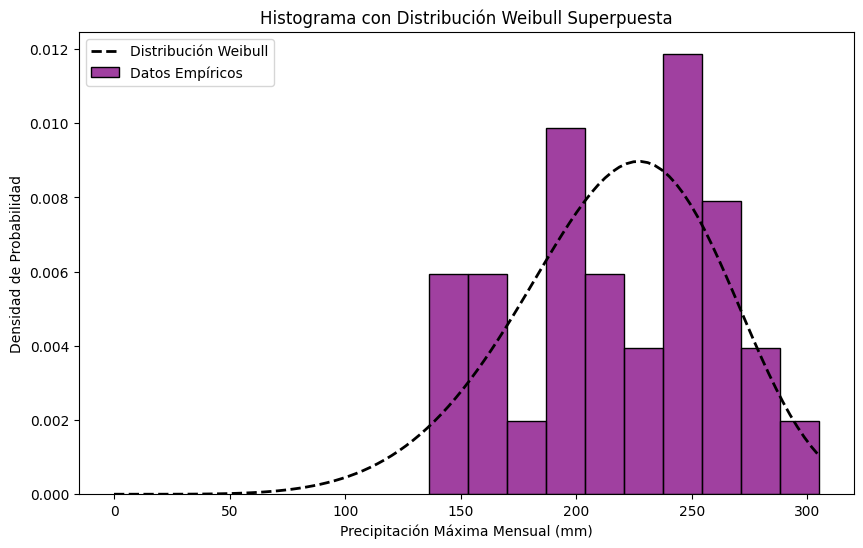

In [158]:
# Ajustar distribución Weibull
c_weibull, loc_weibull, scale_weibull = stats.weibull_min.fit(max_anual['Precipitación_Maxima'], floc=0)

# Crear valores para la distribución Weibull
x = np.linspace(0, max(max_anual['Precipitación_Maxima']), 100)
pdf_weibull = stats.weibull_min.pdf(x, c_weibull, loc=loc_weibull, scale=scale_weibull)

# Plotear el histograma y la distribución Weibull
plt.figure(figsize=(10, 6))
sns.histplot(max_anual['Precipitación_Maxima'], bins=10, kde=False, stat='density', color='purple', label='Datos Empíricos')
plt.plot(x, pdf_weibull, 'k--', linewidth=2, label='Distribución Weibull')
plt.title('Histograma con Distribución Weibull Superpuesta')
plt.xlabel('Precipitación Máxima Mensual (mm)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

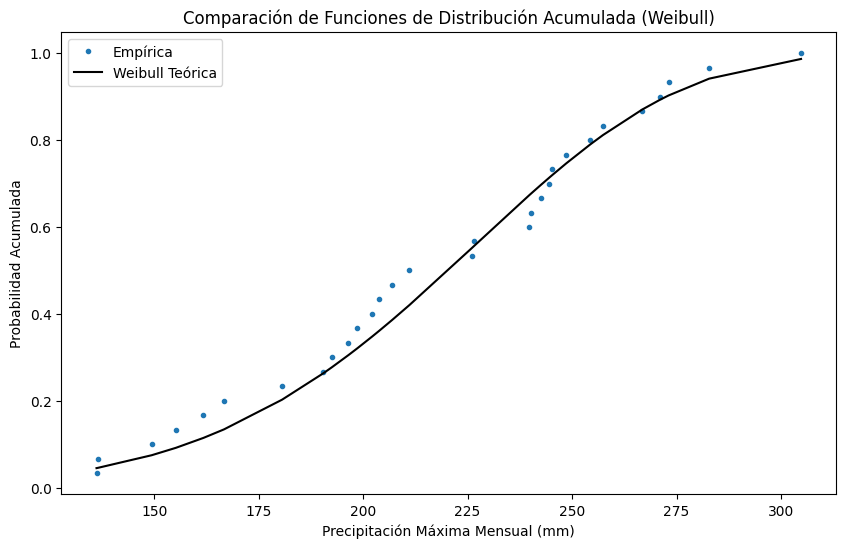

In [159]:
# Calcular la función de distribución acumulada teórica (Weibull)
cdf_weibull = stats.weibull_min.cdf(sorted_data, c_weibull, loc=loc_weibull, scale=scale_weibull)

# Plotear
plt.figure(figsize=(10, 6))
plt.plot(sorted_data, ecdf, marker='.', linestyle='none', label='Empírica')
plt.plot(sorted_data, cdf_weibull, 'k-', label='Weibull Teórica')
plt.title('Comparación de Funciones de Distribución Acumulada (Weibull)')
plt.xlabel('Precipitación Máxima Mensual (mm)')
plt.ylabel('Probabilidad Acumulada')
plt.legend()
plt.show()

In [160]:
# Prueba de Kolmogorov-Smirnov para Weibull
ks_stat_weibull, ks_p_weibull = stats.kstest(max_anual['Precipitación_Maxima'], 'weibull_min', args=(c_weibull, loc_weibull, scale_weibull))
print(f"Kolmogorov-Smirnov (Weibull): Estadístico={ks_stat_weibull:.4f}, p-valor={ks_p_weibull:.4f}")

Kolmogorov-Smirnov (Weibull): Estadístico=0.1069, p-valor=0.8468


In [161]:
print("\nResumen del Ajuste a la Distribución Weibull:")
print(f"Forma (c): {c_weibull:.2f}")
print(f"Loc: {loc_weibull:.2f}")
print(f"Scale: {scale_weibull:.2f}")
print(f"Kolmogorov-Smirnov Estadístico: {ks_stat_weibull:.4f}, p-valor: {ks_p_weibull:.4f}")


Resumen del Ajuste a la Distribución Weibull:
Forma (c): 5.64
Loc: 0.00
Scale: 235.04
Kolmogorov-Smirnov Estadístico: 0.1069, p-valor: 0.8468


Distribución Gumbel

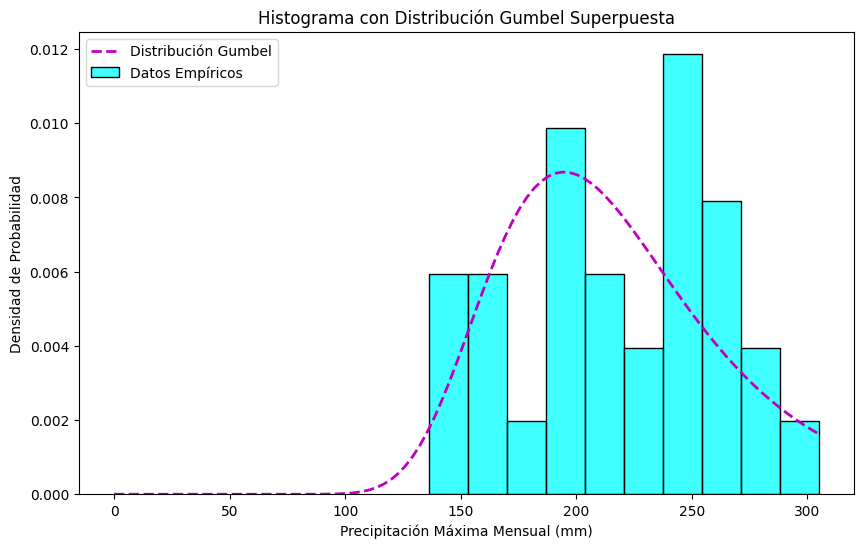

In [162]:
# Ajustar distribución Gumbel
mu_gumbel, beta_gumbel = stats.gumbel_r.fit(max_anual['Precipitación_Maxima'])

# Crear valores para la distribución Gumbel
x = np.linspace(0, max(max_anual['Precipitación_Maxima']), 100)
pdf_gumbel = stats.gumbel_r.pdf(x, mu_gumbel, beta_gumbel)

# Plotear el histograma y la distribución Gumbel
plt.figure(figsize=(10, 6))
sns.histplot(max_anual['Precipitación_Maxima'], bins=10, kde=False, stat='density', color='cyan', label='Datos Empíricos')
plt.plot(x, pdf_gumbel, 'm--', linewidth=2, label='Distribución Gumbel')
plt.title('Histograma con Distribución Gumbel Superpuesta')
plt.xlabel('Precipitación Máxima Mensual (mm)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

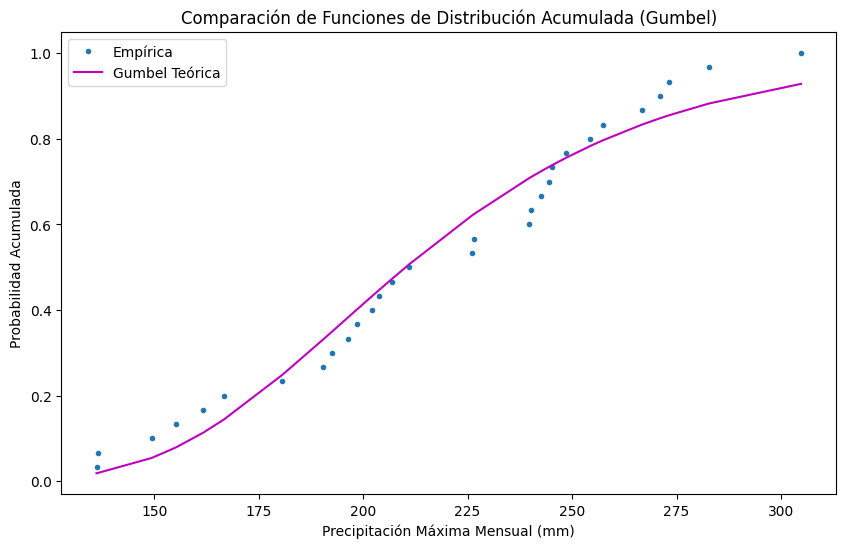

In [163]:
# Calcular la función de distribución acumulada teórica (Gumbel)
cdf_gumbel = stats.gumbel_r.cdf(sorted_data, mu_gumbel, beta_gumbel)

# Plotear
plt.figure(figsize=(10, 6))
plt.plot(sorted_data, ecdf, marker='.', linestyle='none', label='Empírica')
plt.plot(sorted_data, cdf_gumbel, 'm-', label='Gumbel Teórica')
plt.title('Comparación de Funciones de Distribución Acumulada (Gumbel)')
plt.xlabel('Precipitación Máxima Mensual (mm)')
plt.ylabel('Probabilidad Acumulada')
plt.legend()
plt.show()

In [164]:
# Prueba de Kolmogorov-Smirnov para Gumbel
ks_stat_gumbel, ks_p_gumbel = stats.kstest(max_anual['Precipitación_Maxima'], 'gumbel_r', args=(mu_gumbel, beta_gumbel))
print(f"Kolmogorov-Smirnov (Gumbel): Estadístico={ks_stat_gumbel:.4f}, p-valor={ks_p_gumbel:.4f}")

Kolmogorov-Smirnov (Gumbel): Estadístico=0.1419, p-valor=0.5353


In [165]:
# Método de Momentos
mean_data = np.mean(max_anual['Precipitación_Maxima'])
std_data = np.std(max_anual['Precipitación_Maxima'], ddof=1)

gamma_const = 0.5772156649  # Constante de Euler-Mascheroni

beta_mm = std_data / (np.pi / np.sqrt(6))
mu_mm = mean_data - gamma_const * beta_mm

print(f"\nMétodo de Momentos para Gumbel:")
print(f"Mu: {mu_mm:.4f} mm")
print(f"Beta: {beta_mm:.4f} mm")

# Comparar con parámetros ajustados por Scipy
print(f"\nParámetros ajustados por Scipy (Gumbel):")
print(f"Mu: {mu_gumbel:.2f}")
print(f"Beta: {beta_gumbel:.2f}")


Método de Momentos para Gumbel:
Mu: 196.7821 mm
Beta: 35.1478 mm

Parámetros ajustados por Scipy (Gumbel):
Mu: 194.67
Beta: 42.36


In [166]:
print("\nResumen del Ajuste a la Distribución Gumbel:")
print(f"Mu: {mu_gumbel:.2f}")
print(f"Beta: {beta_gumbel:.2f}")
print(f"Kolmogorov-Smirnov Estadístico: {ks_stat_gumbel:.4f}, p-valor: {ks_p_gumbel:.4f}")


Resumen del Ajuste a la Distribución Gumbel:
Mu: 194.67
Beta: 42.36
Kolmogorov-Smirnov Estadístico: 0.1419, p-valor: 0.5353


Compara los ajustes de las distribuciones

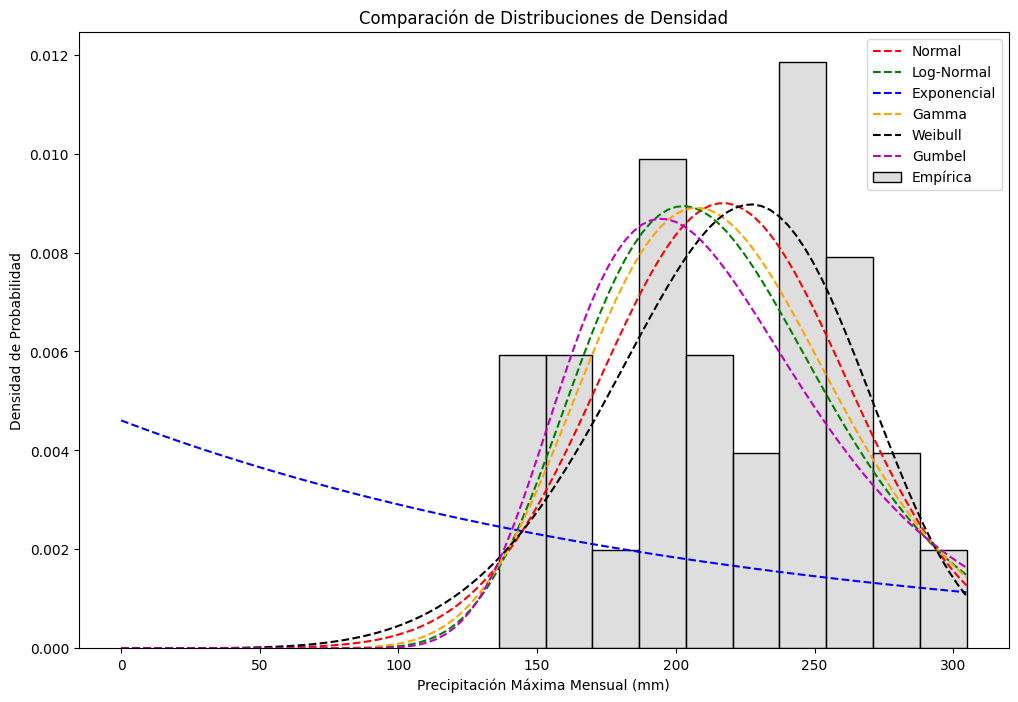

In [167]:
plt.figure(figsize=(12, 8))

# Histograma Empírico
sns.histplot(max_anual['Precipitación_Maxima'], bins=10, kde=False, stat='density', color='lightgray', label='Empírica')

# Distribuciones Teóricas
# Normal
plt.plot(x, stats.norm.pdf(x, mu, std), 'r--', label='Normal')

# Log-Normal
plt.plot(x, stats.lognorm.pdf(x, shape, loc, scale), 'g--', label='Log-Normal')

# Exponencial
plt.plot(x, stats.expon.pdf(x, loc=loc_exp, scale=scale_exp), 'b--', label='Exponencial')

# Gamma
plt.plot(x, stats.gamma.pdf(x, shape_gamma, loc=loc_gamma, scale=scale_gamma), 'orange', linestyle='--', label='Gamma')

# Weibull
plt.plot(x, stats.weibull_min.pdf(x, c_weibull, loc=loc_weibull, scale=scale_weibull), 'k--', label='Weibull')

# Gumbel
plt.plot(x, stats.gumbel_r.pdf(x, mu_gumbel, beta_gumbel), 'm--', label='Gumbel')

plt.title('Comparación de Distribuciones de Densidad')
plt.xlabel('Precipitación Máxima Mensual (mm)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

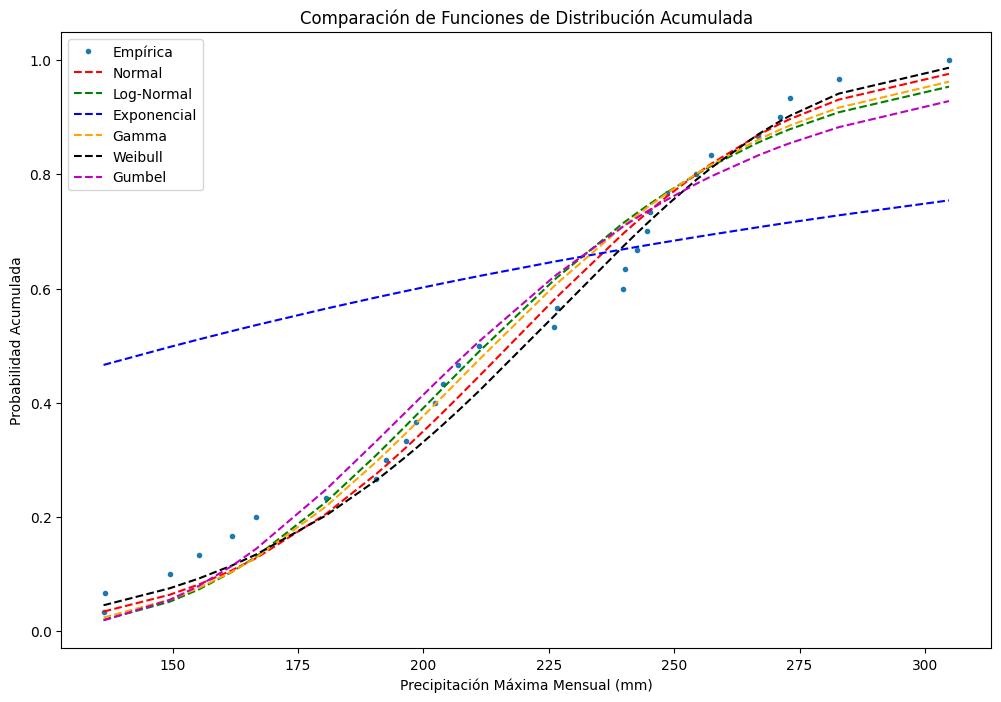

In [168]:
plt.figure(figsize=(12, 8))

# Datos Empíricos
plt.plot(sorted_data, ecdf, marker='.', linestyle='none', label='Empírica')

# Distribuciones Teóricas
# Normal
cdf_norm = stats.norm.cdf(sorted_data, mu, std)
plt.plot(sorted_data, cdf_norm, 'r--', label='Normal')

# Log-Normal
cdf_lognorm = stats.lognorm.cdf(sorted_data, shape, loc, scale)
plt.plot(sorted_data, cdf_lognorm, 'g--', label='Log-Normal')

# Exponencial
cdf_expon = stats.expon.cdf(sorted_data, loc=loc_exp, scale=scale_exp)
plt.plot(sorted_data, cdf_expon, 'b--', label='Exponencial')

# Gamma
cdf_gamma = stats.gamma.cdf(sorted_data, shape_gamma, loc=loc_gamma, scale=scale_gamma)
plt.plot(sorted_data, cdf_gamma, 'orange', linestyle='--', label='Gamma')

# Weibull
cdf_weibull = stats.weibull_min.cdf(sorted_data, c_weibull, loc=loc_weibull, scale=scale_weibull)
plt.plot(sorted_data, cdf_weibull, 'k--', label='Weibull')

# Gumbel
cdf_gumbel = stats.gumbel_r.cdf(sorted_data, mu_gumbel, beta_gumbel)
plt.plot(sorted_data, cdf_gumbel, 'm--', label='Gumbel')

plt.title('Comparación de Funciones de Distribución Acumulada')
plt.xlabel('Precipitación Máxima Mensual (mm)')
plt.ylabel('Probabilidad Acumulada')
plt.legend()
plt.show()

In [170]:
# Crear un DataFrame para almacenar los resultados
results = pd.DataFrame(columns=['Distribución', 'Estadístico KS', 'p-valor KS', 'H0 Rechazada'])

# Normal
results = results.append({
    'Distribución': 'Normal',
    'Estadístico KS': ks_stat,
    'p-valor KS': ks_p,
    'H0 Rechazada': 'Sí' if ks_p < 0.05 else 'No'
}, ignore_index=True)

# Log-Normal
results = results.append({
    'Distribución': 'Log-Normal',
    'Estadístico KS': ks_stat_lognorm,
    'p-valor KS': ks_p_lognorm,
    'H0 Rechazada': 'Sí' if ks_p_lognorm < 0.05 else 'No'
}, ignore_index=True)

# Exponencial
results = results.append({
    'Distribución': 'Exponencial',
    'Estadístico KS': ks_stat_expon,
    'p-valor KS': ks_p_expon,
    'H0 Rechazada': 'Sí' if ks_p_expon < 0.05 else 'No'
}, ignore_index=True)

# Gamma
results = results.append({
    'Distribución': 'Gamma',
    'Estadístico KS': ks_stat_gamma,
    'p-valor KS': ks_p_gamma,
    'H0 Rechazada': 'Sí' if ks_p_gamma < 0.05 else 'No'
}, ignore_index=True)

# Weibull
results = results.append({
    'Distribución': 'Weibull',
    'Estadístico KS': ks_stat_weibull,
    'p-valor KS': ks_p_weibull,
    'H0 Rechazada': 'Sí' if ks_p_weibull < 0.05 else 'No'
}, ignore_index=True)

# Gumbel
results = results.append({
    'Distribución': 'Gumbel',
    'Estadístico KS': ks_stat_gumbel,
    'p-valor KS': ks_p_gumbel,
    'H0 Rechazada': 'Sí' if ks_p_gumbel < 0.05 else 'No'
}, ignore_index=True)

# Mostrar los resultados
print("\nResultados de las Pruebas de Bondad de Ajuste (Kolmogorov-Smirnov):")
results


Resultados de las Pruebas de Bondad de Ajuste (Kolmogorov-Smirnov):


,Distribución,Estadístico KS,p-valor KS,H0 Rechazada
0,Normal,0.129305,0.650467,No
1,Log-Normal,0.147806,0.483427,No
2,Exponencial,0.466047,0.000002,Sí
3,Gamma,0.142566,0.529097,No
4,Weibull,0.106949,0.846777,No
5,Gumbel,0.141865,0.535333,No


Resumen Final y Conclusión

In [173]:
print("\nDistribuciones que no rechazan H0 (p-valor >= 0.05):")
results[results['H0 Rechazada'] == 'No']


Distribuciones que no rechazan H0 (p-valor >= 0.05):


,Distribución,Estadístico KS,p-valor KS,H0 Rechazada
0,Normal,0.129305,0.650467,No
1,Log-Normal,0.147806,0.483427,No
3,Gamma,0.142566,0.529097,No
4,Weibull,0.106949,0.846777,No
5,Gumbel,0.141865,0.535333,No


Define cuál es la mejor distribución que se ajusta a tus datos. Argumenta interpretando la comparación entre los gráficos y analizando las pruebas de ajuste de curva.

- Distribución Weibull y Distribución Gamma parecen ser las mejores opciones para ajustar los datos de precipitaciones máximas mensuales, ya que se ajustan mejor tanto en la región central como en las colas.

- La Log-Normal y la Gumbel también hacen un buen trabajo, pero muestran ligeras discrepancias con los datos empíricos en ciertas regiones.

## DISEÑO DE OBRAS HIDRÁULICAS

### Precipitación de diseño de obras hidráulicas

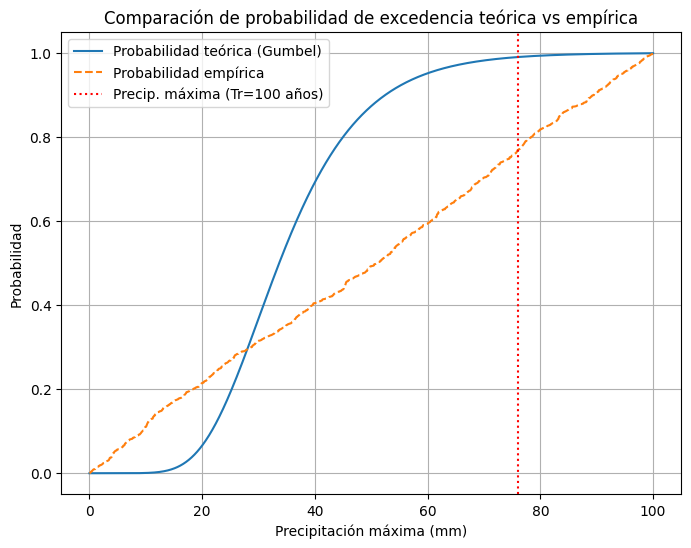

(76.0014922677658, 0.01, 0.99)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme, gumbel_r

loc = 30  # media de la distribución
scale = 10  # desviación estándar de la distribución

# Definimos el periodo de retorno y calculamos la probabilidad de excedencia
Tr = 100  # Periodo de retorno en años para riego mediano (límite inferior)
P_exe = 1 / Tr

# Complemento de la probabilidad de excedencia
complemento_Pexe = 1 - P_exe

# Generamos un rango de valores de precipitación
precip_max = np.linspace(0, 100, 1000)

# Usamos la distribución Gumbel para calcular la precipitación máxima
cdf = gumbel_r.cdf(precip_max, loc=loc, scale=scale)
precip_calc = gumbel_r.ppf(complemento_Pexe, loc=loc, scale=scale)

# Probabilidad empírica (se debe ajustar según los datos reales)
# Aquí es solo un ejemplo para comparar con la teórica
prob_empirica = np.random.uniform(0, 1, size=1000)
prob_empirica.sort()

# Gráfico comparativo probabilidad teórica vs empírica
plt.figure(figsize=(8, 6))
plt.plot(precip_max, cdf, label="Probabilidad teórica (Gumbel)")
plt.plot(np.sort(precip_max), prob_empirica, label="Probabilidad empírica", linestyle='--')
plt.axvline(x=precip_calc, color='r', linestyle=':', label=f'Precip. máxima (Tr={Tr} años)')
plt.title("Comparación de probabilidad de excedencia teórica vs empírica")
plt.xlabel("Precipitación máxima (mm)")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar resultados del cálculo
precip_calc, P_exe, complemento_Pexe

- ¿Qué significa el periodo de retorno de 100 años? significa que, en promedio, una precipitación de esa magnitud (como se indica en la gráfica, alrededor de los 80 mm) ocurre una vez cada 100 años.

- ¿Qué pasa si incrementamos el periodo de retorno? significa que estamos considerando eventos más raros y más extremos. A medida que el periodo de retorno aumenta (por ejemplo, de 100 a 200 o 500 años), el valor de la precipitación máxima que podemos esperar también aumentará.

- ¿El caudal máximo para este periodo de retorno será el mismo si utilizamos datos históricos de otro estado? No, el caudal máximo para un periodo de retorno de 100 años no será necesariamente el mismo en otro estado. El caudal o precipitación máxima depende de las condiciones climáticas y geográficas de cada región.

- ¿Por qué crees que las obras hidráulicas deben diseñarse en base a periodos de retorno sugeridos? para asegurar que puedan resistir eventos extremos que, aunque raros, podrían ocurrir durante la vida útil de la obra.

- ¿Por qué es importante conocer la distribución de probabilidad a la que mejor se aproximan los datos históricos? Para Modelar correctamente los eventos climáticos y sus probabilidades, Mejorar la precisión en el diseño de obras hidráulicas y Evaluar riesgos.